In [2]:
import os
from game_simulation1 import *
import matplotlib.pyplot as plt

### Cross entropy method Without Noise


#### Covariance-Based CEM

Iteration 1: Average score of best samples: 1.1
Iteration 2: Average score of best samples: 3.5
Iteration 3: Average score of best samples: 12.2
Iteration 4: Average score of best samples: 35.2
Iteration 5: Average score of best samples: 54.5
Iteration 6: Average score of best samples: 60.4
Iteration 7: Average score of best samples: 81.5
Iteration 8: Average score of best samples: 81.2
Iteration 9: Average score of best samples: 75.7
Iteration 10: Average score of best samples: 79.8


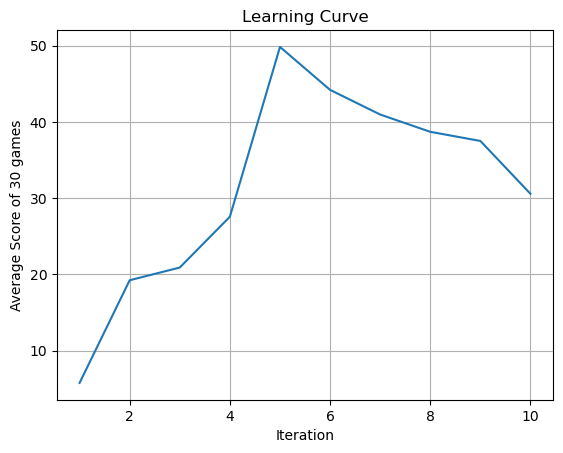

In [8]:
np.random.seed(42)

# Number of samples
N = 100

# Proportion of best samples to select
rho = 0.1

# Number of iterations
iterations = 10

# Number of played games
num_games = 30

# Initialization 
w = np.zeros(21)
Sigma = 100 * np.eye(21)

learning_curve = []

for t in range(iterations):
    # Generate samples from the current Gaussian distribution
    samples = np.random.multivariate_normal(w, Sigma, N)

    # Evaluate each sample with the score function (game simulation)
    scores = np.array([simulation(sample,0) for sample in samples])

    # Sort samples based on their score and select the best ones
    best_samples_indices = np.argsort(scores)[-int(N * rho):]
    best_samples = samples[best_samples_indices]

    # Update w with the empirical mean of the selected best samples
    w = np.mean(best_samples, axis=0)

    # Update Sigma with the empirical covariance of the selected best samples
    Sigma = np.cov(best_samples, rowvar=False)

    # Compute the learning curve with the mean weights of the new distribution
    # Play num_games games with these mean weights and record the scores
    game_scores = [simulation(w,0) for _ in range(num_games)]
    learning_curve.append(np.mean(game_scores))

    # Print the average score of the best samples at each iteration
    print("Iteration {}: Average score of best samples: {}".format(t+1, np.mean(scores[best_samples_indices])))


plt.plot(range(1, iterations + 1), learning_curve, '-', label='Learning Curve')
plt.xlabel('Iteration')
plt.ylabel(f'Average Score of {num_games} games')
plt.title('Learning Curve')
plt.grid(True)
plt.show()

### Variance-Based CEM

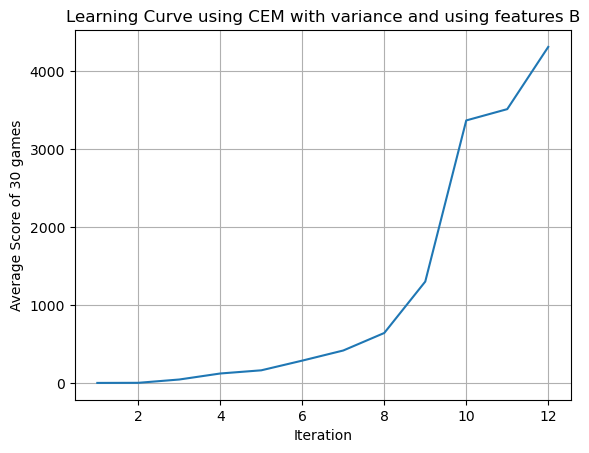

In [6]:
plt.plot(range(1, iterations + 1), learning_curve, '-', label='Learning Curve')
plt.xlabel('Iteration')
plt.ylabel(f'Average Score of {num_games} games')
plt.title('Learning Curve using CEM with variance and using features B')
plt.grid(True)
plt.show()
# plt.savefig('Learning Curve using CEM with variance and using features B.png', dpi=300, bbox_inches='tight')

Iteration 1: Average score of best samples: 1.1
Iteration 2: Average score of best samples: 8.1
Iteration 3: Average score of best samples: 44.3
Iteration 4: Average score of best samples: 65.9
Iteration 5: Average score of best samples: 171.5
Iteration 6: Average score of best samples: 313.5
Iteration 7: Average score of best samples: 421.4
Iteration 8: Average score of best samples: 543.5
Iteration 9: Average score of best samples: 1046.4
Iteration 10: Average score of best samples: 2786.3
Iteration 11: Average score of best samples: 3187.1
Iteration 12: Average score of best samples: 7434.8


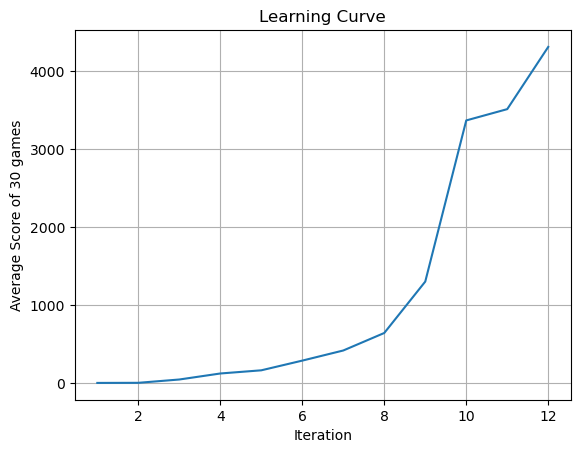

In [3]:
np.random.seed(42)
# Number of samples
N = 100
# Proportion of best samples to select
rho = 0.1
# Number of iterations
iterations = 12

# Number of games to play to compute the learning curve
num_games = 30

# Initialization
w = np.zeros(21)
Sigma = 100 * np.ones(21)

learning_curve = []
for t in range(iterations):
    # Generate samples from the current Gaussian distribution
    samples = np.random.normal(loc=w, scale=np.sqrt(Sigma), size=(N, w.shape[0]))

    # Evaluate each sample with the score function (game simulation)
    scores = np.array([simulation(sample,0) for sample in samples])

    # Sort samples based on their score and select the best ones
    best_samples_indices = np.argsort(scores)[-int(N * rho):]
    best_samples = samples[best_samples_indices]

    # Update w with the empirical mean of the selected best samples
    w = np.mean(best_samples, axis=0)

    # Update Sigma with the empirical variance of the selected best samples
    Sigma = np.var(best_samples, axis=0)

    # Compute the learning curve with the mean weights of the new distribution
    # Play num_games games with these mean weights and record the scores
    game_scores = [simulation(w,0) for _ in range(num_games)]
    learning_curve.append(np.mean(game_scores))

    # Print the average score of the best samples at each iteration
    print("Iteration {}: Average score of best samples: {}".format(t+1, np.mean(scores[best_samples_indices])))

# Plot the learning curve
# Plot the learning curve with confidence intervals
plt.plot(range(1, iterations + 1), learning_curve, '-', label='Learning Curve')
plt.xlabel('Iteration')
plt.ylabel(f'Average Score of {num_games} games')
plt.title('Learning Curve')
plt.grid(True)
plt.show()